# Exercises ch 2

# problem 2

In [3]:
import nltk
pursuasion = nltk.corpus.gutenberg.raw('austen-persuasion.txt')
words = nltk.word_tokenize(pursuasion)
corpus_tokens = set([word.lower() for word in words])
print(list(corpus_tokens)[:10])
print(len(corpus_tokens))

['nerves', 'soothe', 'foolish', 'whine', 'noises', 'interposed', 'alliances', 'know', 'own', 'approved']
5943


# problem 3

In [4]:
brown_categories = nltk.corpus.brown.categories()
for category in brown_categories[:2]:
    print(category)
    print(nltk.corpus.brown.words(categories=category))
    print('\n')

adventure
['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]


belles_lettres
['Northern', 'liberals', 'are', 'the', 'chief', ...]




# problem 4

There is a similar example in the lecture notes

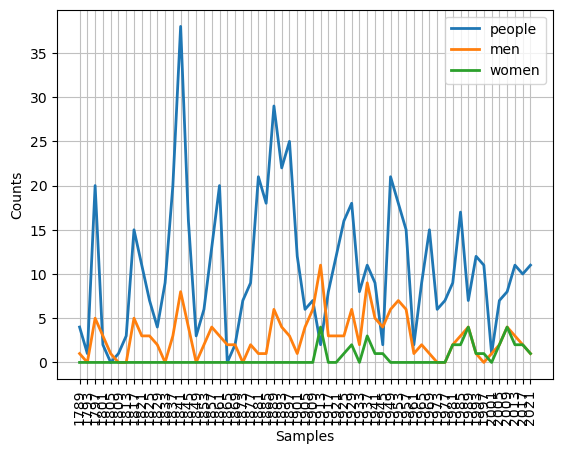

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
from nltk.corpus import inaugural
sou = inaugural.fileids()

cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['men','women','people']
    if w.lower().startswith(target)
)
cfd.plot()

# Problem 5

In [6]:
from nltk.corpus import wordnet as wn

nouns = ['car','dog','cat','donkey','weirdo','dummy','nerd','goofball']

for noun in nouns:
    synsets = wn.synsets(noun)
    for synset in synsets:
        for obj in [synset,synset.definition(),synset.part_meronyms(),
                  synset.substance_meronyms(),synset.member_holonyms(),
                    synset.part_holonyms(),synset.substance_holonyms(),synset.hyponyms()]:
            print(f"{obj}")
            print('new object \n')
        print('new synset \n')
    #for s in synsets:
    #    print

Synset('car.n.01')
new object 

a motor vehicle with four wheels; usually propelled by an internal combustion engine
new object 

[Synset('accelerator.n.01'), Synset('air_bag.n.01'), Synset('auto_accessory.n.01'), Synset('automobile_engine.n.01'), Synset('automobile_horn.n.01'), Synset('buffer.n.06'), Synset('bumper.n.02'), Synset('car_door.n.01'), Synset('car_mirror.n.01'), Synset('car_seat.n.01'), Synset('car_window.n.01'), Synset('fender.n.01'), Synset('first_gear.n.01'), Synset('floorboard.n.02'), Synset('gasoline_engine.n.01'), Synset('glove_compartment.n.01'), Synset('grille.n.02'), Synset('high_gear.n.01'), Synset('hood.n.09'), Synset('luggage_compartment.n.01'), Synset('rear_window.n.01'), Synset('reverse.n.02'), Synset('roof.n.02'), Synset('running_board.n.01'), Synset('stabilizer_bar.n.01'), Synset('sunroof.n.01'), Synset('tail_fin.n.02'), Synset('third_gear.n.01'), Synset('window.n.02')]
new object 

[]
new object 

[]
new object 

[]
new object 

[]
new object 

[Synset('am

# Problem 8

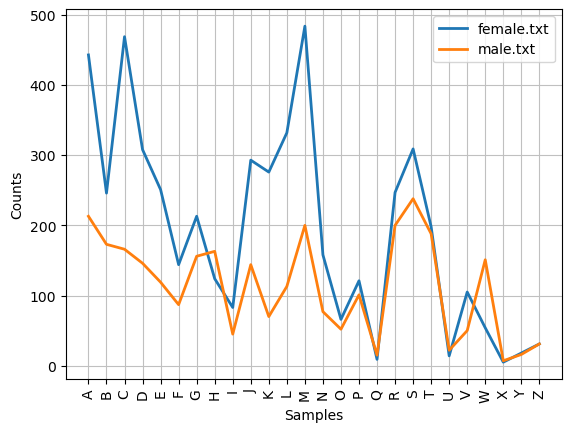

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
names = nltk.corpus.names
m = [l[0] for l in names.words('male.txt')]
f = [l[0] for l in names.words('female.txt')]
cfd = nltk.ConditionalFreqDist(
    (fileid,name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

# Problem 9

In [9]:
import nltk
from nltk.book import text1, text2
from nltk.corpus import stopwords
from nltk.probability import FreqDist

text1 = [j.lower() for j in filter_text(text1) if j.lower() not in stopwords.words('english')]
text2 = [j.lower() for j in filter_text(text2) if j.lower() not in stopwords.words('english')]

freq1 = nltk.probability.FreqDist(filter_text(text1))
freq2 = nltk.probability.FreqDist(filter_text(text2))
vocab = set(filter_text(text1)).intersection(set(filter_text(text2)))


def filter_text(text):
    return sorted([w for w in text if w.isalpha()])

def lexical_diversity(text):
    return len(text)/len(set(text))


for v in [text1,text2]:
    _ = filter_text(v)
    fdist = FreqDist(_)
    print("Lexical Diversity: ",lexical_diversity(_))
    print('\n')
    print(list(fdist.items())[:10])
    print(3*'\n')

diffs = {}
for word in vocab:
    freq_diff = abs(freq1[word]-freq2[word])
    diffs[word]=freq_diff
    
sorted_diffs = sorted(diffs.items(),key=lambda x: x[1],reverse=True)

#print the 10 words with largest frequency differences
for word, freq_diff in sorted_diffs[:100]:
    print(f"{word}: {freq_diff}")

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
Lexical Diversity:  6.574157838352577


[('aback', 2), ('abaft', 2), ('abandon', 3), ('abandoned', 7), ('abandonedly', 1), ('abandonment', 2), ('abased', 2), ('abasement', 1), ('abashed', 2), ('abate', 1)]




Lexical Diversity:  8.78106701366298


[('abandoned', 1), ('abatement', 1), ('abbeyland', 1), ('abhor', 1), ('abhorred', 2), ('abhorrence', 4), ('abilities', 9), ('ability', 3), ('able', 46), ('ablest', 1)]




one: 590
like: 564
mrs: 517
ye: 471
upon: 468
old: 406
man: 406


# Problem 12

In [10]:
entries = nltk.corpus.cmudict.entries()
print(len(entries))

133737


In [11]:
for entry in entries[:10]:
    print(entry)

('a', ['AH0'])
('a.', ['EY1'])
('a', ['EY1'])
('a42128', ['EY1', 'F', 'AO1', 'R', 'T', 'UW1', 'W', 'AH1', 'N', 'T', 'UW1', 'EY1', 'T'])
('aaa', ['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1'])
('aaberg', ['AA1', 'B', 'ER0', 'G'])
('aachen', ['AA1', 'K', 'AH0', 'N'])
('aachener', ['AA1', 'K', 'AH0', 'N', 'ER0'])
('aaker', ['AA1', 'K', 'ER0'])
('aalseth', ['AA1', 'L', 'S', 'EH0', 'TH'])


In [17]:
s = []
for entry in entries:
    if entry[0].isalpha():
        s.append(entry[0])
print(len(s))

124996


In [18]:
len(set(s))/len(s)

0.9242935773944766

# Problem 13

In [22]:
from nltk.corpus import wordnet as wn

allsynsets = list(wn.all_synsets('n'))
count=0
for synset in allsynsets:
    if len(synset.hyponyms())==0:
        count+=1
print(count)
print(count/len(allsynsets))

65422
0.7967119283931072


# Problem 14

In [26]:
for c in wn.synsets('car'):
    print(c.definition())
    print(c.hyponyms())
    print(c.hypernyms())

a motor vehicle with four wheels; usually propelled by an internal combustion engine
[Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), Synset('used-car.n.01')]
[Synset('motor_vehicle.n.01')]
a wheeled vehicle adapted to the rails of railroad
[Synset('baggage_car.n.01'), Synset('cabin_car.

In [42]:
def supergloss(s):
    string = s.definition()
    for index1,c in enumerate(s.hyponyms()):
        if index1==0:
            string += ';\n\n hyponyms: '+str(c)
        else:
            string +='; '+str(c)
    for index2,v in enumerate(s.hypernyms()):
        if index2==0:
            string += ';\n\n hypernyms: '+str(v)
        else:
            string +='; '+str(v)
    return string

In [43]:
print(supergloss(wn.synset('car.n.01')))

a motor vehicle with four wheels; usually propelled by an internal combustion engine;

 hyponyms: Synset('ambulance.n.01'); Synset('beach_wagon.n.01'); Synset('bus.n.04'); Synset('cab.n.03'); Synset('compact.n.03'); Synset('convertible.n.01'); Synset('coupe.n.01'); Synset('cruiser.n.01'); Synset('electric.n.01'); Synset('gas_guzzler.n.01'); Synset('hardtop.n.01'); Synset('hatchback.n.01'); Synset('horseless_carriage.n.01'); Synset('hot_rod.n.01'); Synset('jeep.n.01'); Synset('limousine.n.01'); Synset('loaner.n.02'); Synset('minicar.n.01'); Synset('minivan.n.01'); Synset('model_t.n.01'); Synset('pace_car.n.01'); Synset('racer.n.02'); Synset('roadster.n.01'); Synset('sedan.n.01'); Synset('sport_utility.n.01'); Synset('sports_car.n.01'); Synset('stanley_steamer.n.01'); Synset('stock_car.n.01'); Synset('subcompact.n.01'); Synset('touring_car.n.01'); Synset('used-car.n.01');

 hypernyms: Synset('motor_vehicle.n.01')


# Problem 15

In [52]:
from nltk.corpus import brown
words = []
for category in brown.categories():
    words.extend(brown.words(categories=category))
d = {}
for w in words:
    if w.isalpha():
        if w.lower() not in d.keys():
            d[w.lower()]=0
        d[w.lower()]+=1
threetimes = [key for key in d.keys() if d[key]==3]
print(len(threetimes))
print(threetimes[:10])

3403
['amazingly', 'sharon', 'starved', 'drunkards', 'powerless', 'nothin', 'laurel', 'stallion', 'paw', 'turf']


# Problem 18

In [62]:
from nltk.corpus import brown
from nltk.corpus import stopwords
words = []
for category in brown.categories():
    words.extend(brown.words(categories=category))
words_cleaned = []
for w in words:
    if w.isalpha() and w not in stopwords.words('english'):
        words_cleaned.append(w.lower())
d = {}
for bg in list(nltk.bigrams(words_cleaned)):
    u = ','.join(sorted(list(bg)))
    if u not in d.keys():
        d[u]=0
    d[u]+=1
sorted(d.items(), key=lambda x:x[1],reverse=True)[:50]

[('states,united', 393),
 ('new,york', 297),
 ('i,said', 243),
 ('i,know', 226),
 ('i,think', 177),
 ('cent,per', 151),
 ('could,i', 140),
 ('ago,years', 138),
 ('he,said', 122),
 ('af,af', 120),
 ('i,would', 119),
 ('first,the', 105),
 ('i,thought', 102),
 ('could,see', 101),
 ('island,rhode', 91),
 ('course,of', 87),
 ('i,told', 85),
 ('addition,in', 85),
 ('i,want', 82),
 ('last,year', 81),
 ('even,though', 78),
 ('man,the', 76),
 ('high,school', 76),
 ('i,knew', 75),
 ('first,time', 75),
 ('new,the', 74),
 ('but,i', 73),
 ('believe,i', 68),
 ('house,white', 68),
 ('man,old', 67),
 ('i,saw', 67),
 ('it,would', 67),
 ('asked,i', 66),
 ('war,world', 66),
 ('example,for', 66),
 ('i,like', 65),
 ('i,see', 64),
 ('let,us', 63),
 ('one,thing', 63),
 ('two,years', 63),
 ('i,never', 62),
 ('could,he', 61),
 ('last,night', 60),
 ('another,one', 60),
 ('fiscal,year', 59),
 ('felt,i', 58),
 ('i,say', 58),
 ('fact,in', 57),
 ('af,the', 57),
 ('day,one', 55)]